In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

from ipywidgets import interact
from datetime import datetime

pd.set_option('display.max_rows', 10)

In [2]:
url = "https://sisgvconsulta.saopaulo.sp.leg.br/ws/Servicos.asmx/ObterCreditoLiderancaJSON"
result = requests.post(url, "ano=2023&mes=8",
                       headers={
                           "Content-Type": "application/x-www-form-urlencoded",
                           "Accept": "application/json"}
                       )
resultJSON = result.json()
df = pd.DataFrame.from_dict(resultJSON)
df = df.sort_values(by='VALOR', ascending=False)
df = df.drop(columns=["Chave", "CENTROCUSTOSID",
             "TPMOVIMENTOID", "TIPODEPARTAMENTO", "VEREADOR"])
df

,DEPARTAMENTO,ANO,MES,VALOR
13,Liderança UNIAO BRASIL/MDB/PTB,2023,8,32118.75
7,Liderança PSDB,2023,8,19765.38
9,Liderança PT,2023,8,19765.38
6,Liderança Pode/PSD/PSC,2023,8,17294.71
3,Liderança de Governo,2023,8,16059.38
...,...,...,...,...
1,Liderança PSB,2023,8,2470.67
2,Liderança Avante,2023,8,2470.67
4,Liderança NOVO,2023,8,2470.67
10,Liderança PV,2023,8,2470.67


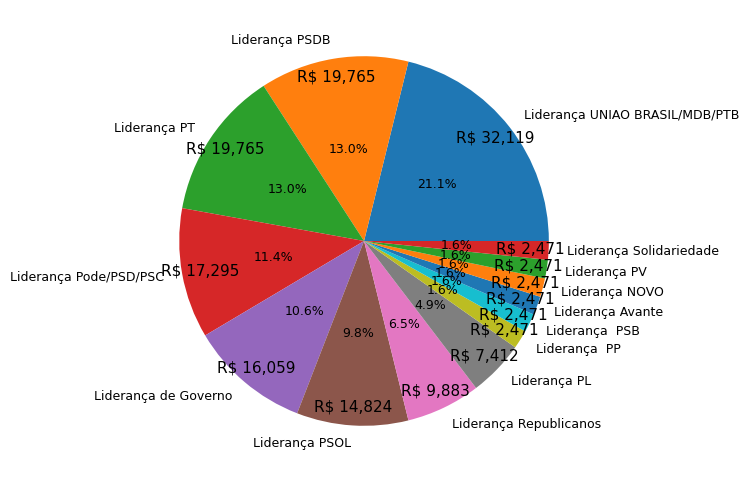

In [3]:
plt.figure(figsize=(10, 6))

anguloInicial = 0
valores = df["VALOR"]
plt.pie(valores, labels=df["DEPARTAMENTO"],
        startangle=anguloInicial, pctdistance=0.5,
        autopct='%1.1f%%', textprops={'fontsize': 9})

total = sum(valores)
radius = 0.9  # Raio do círculo onde os valores serão posicionados
acumulado = 0
for i, v in enumerate(valores):
    angle = (acumulado+(v/2)) / total * 360  # Ângulo médio da fatia
    acumulado += v
    
    x = radius * np.cos(np.deg2rad(angle-anguloInicial))  # Posição x
    y = radius * np.sin(np.deg2rad(angle-anguloInicial))  # Posição y
    plt.text(x, y, f"R$ {v:,.0f}", fontsize=11, va='center', ha='center', )

plt.show()

In [4]:
url = "https://sisgvconsulta.saopaulo.sp.leg.br/ws/Servicos.asmx/ObterCreditoVereadorJSON"
result = requests.post(url, "ano=2023&mes=8",
                       headers={
                           "Content-Type": "application/x-www-form-urlencoded",
                           "Accept": "application/json"}
                       )
resultJSON = result.json()
df = pd.DataFrame.from_dict(resultJSON)
df = df.drop(columns=["Chave","CENTROCUSTOSID","TPMOVIMENTOID","TIPODEPARTAMENTO"])
df

,VEREADOR,ANO,MES,VALOR
0,ADILSON AMADEU,2023,8,32118.75
1,ALESSANDRO GUEDES,2023,8,32118.75
2,ANDRÉ SANTOS,2023,8,32118.75
3,ARSELINO TATTO,2023,8,32118.75
4,ATILIO FRANCISCO,2023,8,32118.75
...,...,...,...,...
50,SENIVAL MOURA,2023,8,32118.75
51,SILVIA DA BANCADA FEMINISTA,2023,8,32118.75
52,THAMMY MIRANDA,2023,8,32118.75
53,TONINHO VESPOLI,2023,8,32118.75


In [5]:
url = "https://sisgvconsulta.saopaulo.sp.leg.br/ws/Servicos.asmx/ObterDebitoLiderancaJSON"
result = requests.post(url, "ano=2023&mes=8",
                       headers={
                           "Content-Type": "application/x-www-form-urlencoded",
                           "Accept": "application/json"}
                       )
resultJSON = result.json()
df = pd.DataFrame.from_dict(resultJSON)
df = df.drop(columns=["Chave", "NomeArquivo",
             "CENTROCUSTOSID", "TIPODEPARTAMENTO", "CNPJ"])
df

,DEPARTAMENTO,VEREADOR,ANO,MES,DESPESA,FORNECEDOR,VALOR
0,Liderança PSB,Liderança PSB,2023,8,CONTRATAÇAO DE PESSOA JURIDICA,ELIZABETH SIBINELLI SOCIEDADE INDIVIDUAL DE AD...,2600.00
1,Liderança Avante,Liderança Avante,2023,8,COMPOSIÇÃO/ARTE/DIAGRAMAÇÃO/PRODUÇÃO/IMPRESSAO...,BRITHE GRAFICA LTDA EPP,3000.00
2,Liderança de Governo,Liderança de Governo,2023,8,CONTRATAÇAO DE PESSOA JURIDICA,BACCI E E BEMFICA SOCIEDADE DE ADVOGADOS,10000.00
3,Liderança de Governo,Liderança de Governo,2023,8,LOCAÇÃO DE MOVEIS E EQUIPAMENTOS,ATTBRASIL TECNOLOGIA LOCAÇÃO E SOLUÇÕES EM INF...,2350.00
4,Liderança de Governo,Liderança de Governo,2023,8,LOCAÇÃO DE MOVEIS E EQUIPAMENTOS,SINALL COM E SERV DE MÁQUINAS LTDA,802.66
...,...,...,...,...,...,...,...
25,Liderança PT,Liderança PT,2023,8,LOCAÇÃO DE MOVEIS E EQUIPAMENTOS,SINALL COM E SERV DE MÁQUINAS LTDA,2734.28
26,Liderança Republicanos,Liderança Republicanos,2023,8,MATERIAL DE ESCRITORIO E OUTROS MATERIAIS DE C...,CAMILA CARVALHO DE SIQUEIRA,699.00
27,Liderança UNIAO BRASIL/MDB/PTB,Liderança UNIAO BRASIL/MDB/PTB,2023,8,COMPOSIÇÃO/ARTE/DIAGRAMAÇÃO/PRODUÇÃO/IMPRESSAO...,JOSE ELEUTERIO DE ALQUINO,2997.75
28,Liderança UNIAO BRASIL/MDB/PTB,Liderança UNIAO BRASIL/MDB/PTB,2023,8,LOCAÇÃO DE MOVEIS E EQUIPAMENTOS,ATTBRASIL TECNOLOGIA LOCAÇÃO E SOLUÇÕES EM INF...,2305.00


In [6]:
@interact(mes=(1, datetime.now().month, 1))
def showMes(mes):
    url = "https://sisgvconsulta.saopaulo.sp.leg.br/ws/Servicos.asmx/ObterDebitoVereadorJSON"
    result = requests.post(url, f"ano=2023&mes={mes}",
                           headers={
                               "Content-Type": "application/x-www-form-urlencoded",
                               "Accept": "application/json"}
                           )
    resultJSON = result.json()
    df = pd.DataFrame.from_dict(resultJSON)
    df = df.drop(columns=["Chave", "NomeArquivo",
                          "CENTROCUSTOSID", "TIPODEPARTAMENTO", "CNPJ"])
    return df

interactive(children=(IntSlider(value=5, description='mes', max=9, min=1), Output()), _dom_classes=('widget-in…

In [7]:
url = "https://sisgvconsulta.saopaulo.sp.leg.br/ws/Servicos.asmx/ObterDebitoVereadorJSON"
result = requests.post(url, f"ano=2023&mes=8",
                       headers={
                           "Content-Type": "application/x-www-form-urlencoded",
                           "Accept": "application/json"}
                       )
resultJSON = result.json()
df = pd.DataFrame.from_dict(resultJSON)
despesas = sorted(df['DESPESA'].unique())

@interact(despesa=widgets.Dropdown(options=despesas, description='DESPESA:'))
def showDespesa(despesa=None):

    dfFiltrado = df.loc[df["DESPESA"] == despesa]
    somas = dfFiltrado[["VALOR"]]
    dfTotal = somas.groupby(dfFiltrado['VEREADOR']).sum().reset_index()

    plt.figure(figsize=(10, 4))
    plt.pie(dfTotal["VALOR"], labels=dfTotal["VEREADOR"])
    plt.show()
    print(dfTotal)

interactive(children=(Dropdown(description='DESPESA:', options=('ASSINATURA DE JORNAIS E REVISTAS', 'COMBUSTIV…

In [8]:
url = "https://sisgvconsulta.saopaulo.sp.leg.br/ws/Servicos.asmx/ObterDebitoVereadorJSON"
result = requests.post(url, f"ano=2023&mes=8",
                       headers={
                           "Content-Type": "application/x-www-form-urlencoded",
                           "Accept": "application/json"}
                       )
resultJSON = result.json()
df = pd.DataFrame.from_dict(resultJSON)
dereadores = sorted(df['VEREADOR'].unique())

@interact(vereador=widgets.Dropdown(options=dereadores, description='VEREADOR:'))
def showDespesa(vereador=None):

    dfFiltrado = df.loc[df["VEREADOR"] == vereador]
    somas = dfFiltrado[["VALOR"]]
    dfTotal = somas.groupby(dfFiltrado['DESPESA']).sum().reset_index()

    plt.figure(figsize=(10, 4))
    plt.pie(dfTotal["VALOR"], labels=dfTotal["DESPESA"])
    plt.show()
    print(dfTotal)

interactive(children=(Dropdown(description='VEREADOR:', options=('ADILSON AMADEU', 'ALESSANDRO GUEDES', 'ANDRÉ…

In [9]:
url = "https://sisgvconsulta.saopaulo.sp.leg.br/ws/Servicos.asmx/ObterDebitoVereadorJSON"
df = None
for mes in range(1, datetime.now().month):
    print("loading", mes)
    result = requests.post(url, f"ano=2023&mes={mes}",
                        headers={
                            "Content-Type": "application/x-www-form-urlencoded",
                            "Accept": "application/json"}
                        )
    resultJSON = result.json()
    mesDF = pd.DataFrame.from_dict(resultJSON)
    if df is None:
        df=mesDF
    else:
        df = pd.concat([df, mesDF], ignore_index=True)

df.to_csv("detalhe_sp_2023.csv", index=False)

loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7
loading 8


In [10]:
@interact(mes=(1, datetime.now().month-1, 1),
          vereador=widgets.Dropdown(options=dereadores, description='VEREADOR:'))
def showDespesa(mes=6, vereador=None):

    dfFiltrado = df.loc[(df["VEREADOR"] == vereador) & (df["MES"] == mes)]
    somas = dfFiltrado[["VALOR"]]
    dfTotal = somas.groupby(dfFiltrado['DESPESA']).sum().reset_index()
    dfTotal = dfTotal.sort_values(by='VALOR')

    plt.figure(figsize=(10, 4))
    plt.pie(dfTotal["VALOR"], labels=dfTotal["DESPESA"])
    print(dfTotal)
    plt.show()

interactive(children=(IntSlider(value=6, description='mes', max=8, min=1), Dropdown(description='VEREADOR:', o…